# Tasca S8.01. Visualitzacions en Python

## Descripció

Aquesta pràctica permetrà explorar com es poden utilitzar eines de visualització avançades en Python per a interpretar i presentar dades de manera efectiva, proporcionant una oportunitat valuosa per a millorar les habilitats analítiques i tècniques.

## Nivell 1



Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

### SQL ALCHEMY

### Importar pandas i establir connexió

In [5]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, inspect

engine = create_engine("mysql+pymysql://root@localhost/ecommerce")
cnx = engine.connect()

#### Importar taula per borrar

### Generar Dataframes

In [7]:
inspector = inspect(engine)
nombre_tablas = inspector.get_table_names()

for table in nombre_tablas:
    query = f"select  * from {table}"
    globals ()[f"df_{table}"] = pd.read_sql(query, cnx)

### Mostrar taules

In [55]:
#print(nombre_tablas)
nombre_tablas
#df_products[df_products["weight"] == 0.5]
df_companies

,id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings
...,...,...,...,...,...,...
95,b-2602,Placerat LLP,05 43 67 24 41,tellus.suspendisse@hotmail.org,Netherlands,https://zoom.us/sub
96,b-2606,Sed Est Corp.,04 58 02 37 91,tempor.bibendum@google.couk,Canada,https://instagram.com/sub/cars
97,b-2610,Egestas Nunc Sed Limited,06 01 02 70 47,vitae@hotmail.edu,Italy,https://walmart.com/one
98,b-2614,Rutrum Non Inc.,02 66 31 61 09,neque@protonmail.net,Germany,https://netflix.com/site


### Importar llibreries

In [11]:
import matplotlib.pyplot as plt #genera gràfics a partir de continguts en llistes, vector amb py i amb l'extensió NumPy
import seaborn as sns #llibreria especialitzada en visualització de dades per py desenvolupada amb matplotlib  i ofereix interficie d'alt nivell
#import squarify
#import plotly.express as px
import numpy as np
import warnings

## Exercici 1
Una variable numèrica.

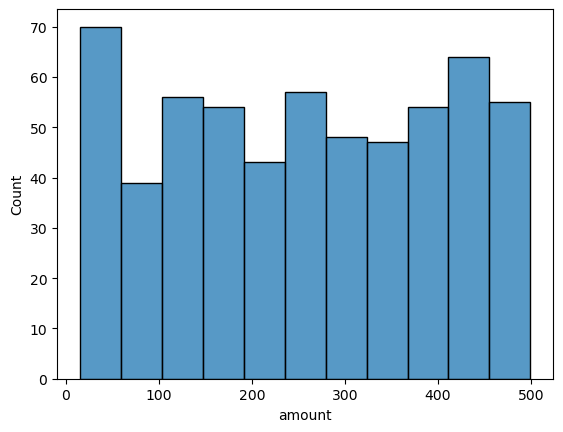

In [15]:
sns.histplot(df_transactions["amount"])
plt.show()

Estem veient que el major nombre d'amounts són els que van de 0 a 50€ aproximadament. </br>
I les que tenen menys, estan entre 50 i 100€.

### Exercici 2
Dues variables numèriques
Ex2 precio peso histograma o boxplot.

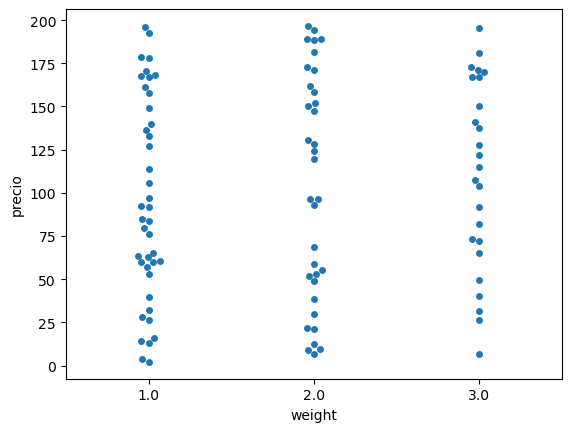

In [36]:
sns.swarmplot(df_products, y="precio", x="weight")
plt.show()

En la visualització, podem veure que no hi ha diferència relativa entre pes i preu. És a dir, el fet que un producte sigui major pes, no vol dir que sigui més car.

### Exercici 3
Una variable categòrica.

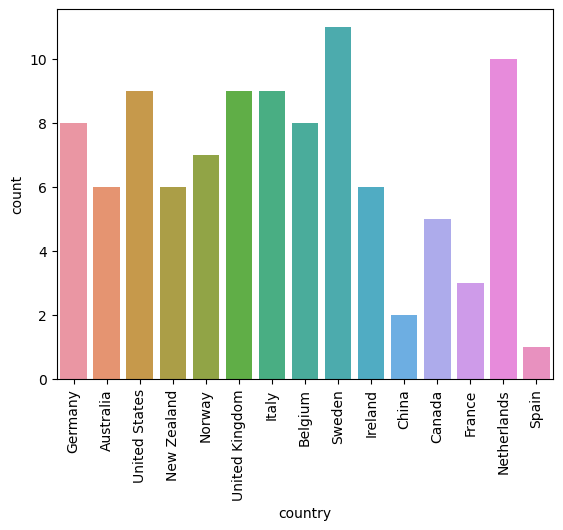

In [45]:
sns.countplot(df_companies, x="country")
plt.xticks(rotation=90)
plt.show()

La variable categòrica escollida és country per companies; i a la visualització podem veure que els països que tenen major nombre de companies són Suècia i Països Baixos; i les que menys Espanya i Xina.

### Exercici 4
Una variable categòrica i una numèrica.

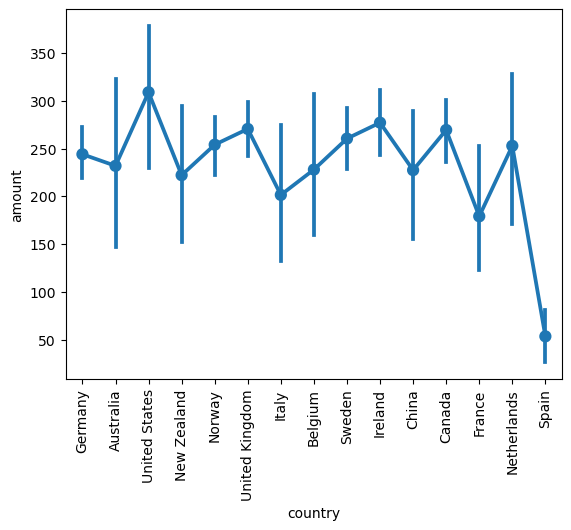

In [93]:
#fem un merge
df_companies_transactions = df_companies.merge(df_transactions, how = "inner", left_on="id", right_on="company_id")
sns.pointplot(df_companies_transactions, x="country", y="amount")
plt.xticks(rotation=90)
plt.show()
#df_companies_transactions

Hem triat una visualització de pointplot  per fer una variable categòrica de pais i una variable númerica amount.</br>
La conclusió que podem treure és que el promig més alt seria el que té Estats Units, i Espanya està en darrer lloc.</br>
A més, també podem veure les líneas amb l'interval de confiança de cada país, que ens mostra el valor més provable d'entrada del proper registre per cada país.

### Exercici 5 i 6
Dues variables categòriques </br>
Tres variables.

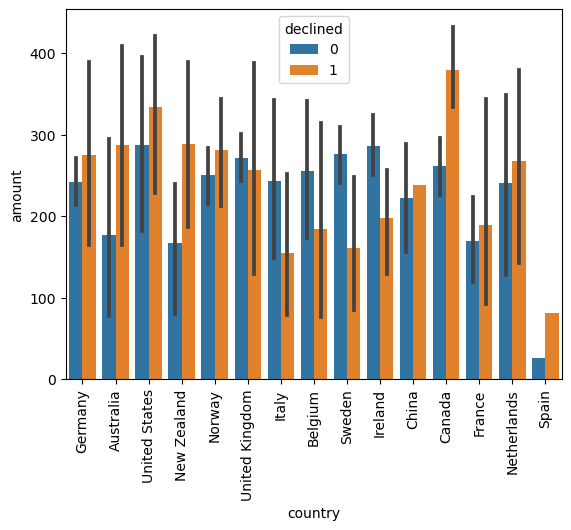

In [91]:
df_companies_transactions = df_companies.merge(df_transactions, how = "inner", left_on="id", right_on="company_id")
#grup = df_companies_transactions.groupby(["declined", "country"])["amount"].mean().reset_index(name="promedio")
sns.barplot(df_companies_transactions, x="country", y="amount", hue="declined")
plt.xticks(rotation=90)
plt.show()

En aquest cas, hem optat per ajuntar els exercicis 5 i 6, i per tant, tenim 2 variables categòriques (declined i country) i una tercera variable que és l'amount. Hem utilitzat barplot, que em fa el promig d'amount i els agrupa per declined i country. Podem veure que en la majoria de països, el valor promig de les transaccions declinades és major que el promig de les transaccions acceptades.

In [ ]:
Ex7 Pairplot: variables númeriques merge transactions i products scutterplot

### Sintàxis de pandas

In [16]:
df_transactions["amount"].describe()


count    587.000000
mean     256.735520
std      144.133895
min       15.050000
25%      131.115000
50%      257.440000
75%      389.900000
max      499.230000
Name: amount, dtype: float64

In [25]:
df_transactions["amount"].mean()

256.7355195911414

#### Proba gràfic

<Axes: xlabel='amount', ylabel='Count'>

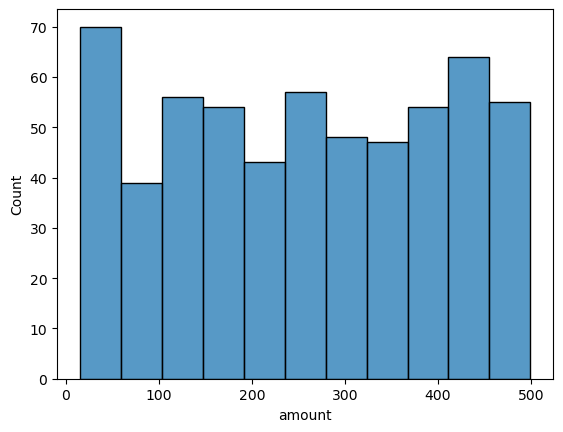

In [35]:
sns.histplot(df_transactions["amount"])

### Tancar connexió

In [18]:
cnx.close()

### Comprovar que la connexió estigui tancada (resposta TRUE)

In [20]:
cnx.closed

True

### Desactivar engine

In [22]:
engine.dispose()